In [2]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import laspy
from shapely.geometry import box, Polygon, MultiPolygon, GeometryCollection
import uuid
import scipy.stats
import seaborn as sns

# from train_split import TrainSplit

In [3]:
las = laspy.read(
    "/mnt/c/Users/maria/Downloads/DUC/DUC_A01_2017_LAS/DUCL0001C0004.las"
)

In [4]:
lidar_data = np.vstack(
    (
        las.X,
        las.Y,
        las.Z,
        las.intensity,
        las.return_number,
        las.number_of_returns,
        las.classification,
    )
).transpose()

In [5]:
lidar_dataset: pd.DataFrame = pd.DataFrame(
    lidar_data,
    columns=[
        "X",
        "Y",
        "Z",
        "intensity",
        "return_number",
        "number_of_returns",
        "classification",
    ],
)

In [6]:
lidar_dataset["X"] = lidar_dataset["X"] / 100
lidar_dataset["Y"] = lidar_dataset["Y"] / 100
lidar_dataset["Z"] = lidar_dataset["Z"] / 100

In [7]:
del las
del lidar_data

In [8]:
lidar_dataset

,X,Y,Z,intensity,return_number,number_of_returns,classification
0,841000.06,9674701.02,113.12,1,1,2,1
1,841000.09,9674700.69,114.02,1,1,1,1
2,841000.10,9674700.31,113.97,1,1,1,1
3,841000.11,9674700.14,114.40,3,1,1,1
4,841000.12,9674699.85,114.55,2,1,1,1
...,...,...,...,...,...,...,...
17035413,841000.00,9674125.71,116.18,6,1,2,1
17035414,841000.24,9674129.95,107.16,1,2,2,1
17035415,841000.22,9674129.66,107.19,1,2,2,1
17035416,841000.18,9674128.53,104.07,1,2,2,1


In [82]:
lidar_dataset["classification"].unique()

array([1, 2], dtype=int32)

In [9]:
lidar_dataset[lidar_dataset["return_number"] == 1]["Z"].describe()

count    1.282069e+07
mean     1.094671e+02
std      1.671870e+01
min      5.472000e+01
25%      9.767000e+01
50%      1.138600e+02
75%      1.226300e+02
max      1.500200e+02
Name: Z, dtype: float64

In [10]:
density = scipy.stats.gaussian_kde(
    lidar_dataset[lidar_dataset["return_number"] == 1]["Z"]
)

In [13]:
x = np.linspace(60, 200, 200)
y = density(x)
data = pd.DataFrame(data=np.vstack([x, y]).transpose(), columns=["X", "Y"])

<Axes: xlabel='X', ylabel='Y'>

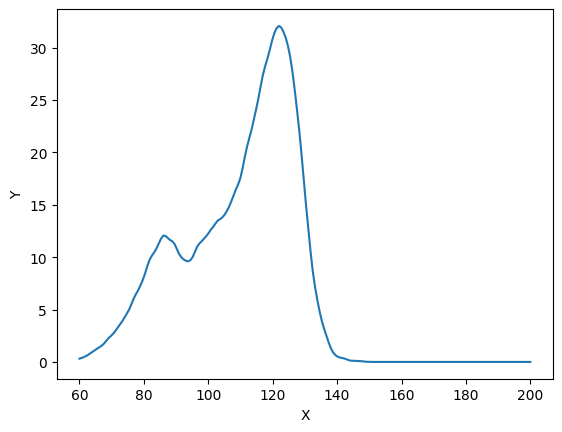

In [14]:
sns.lineplot(data, x="X", y="Y")

In [16]:
bins = 10

<Axes: xlabel='Z', ylabel='Count'>

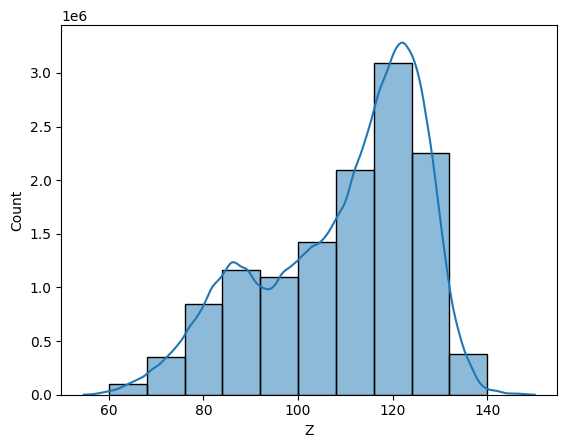

In [17]:
sns.histplot(
    data=lidar_dataset[
        (lidar_dataset["return_number"] == 1)
    ]["Z"],
    bins=bins,
    kde=True,
    binrange=(60, 140)
)

In [18]:
first_returns_hist, first_returns_bin_edges = np.histogram(
    lidar_dataset[lidar_dataset["return_number"] == 1]["Z"],
    bins=bins,
    density=True,
    range=(60, 140)
)

In [20]:
first_returns_hist, first_returns_bin_edges

(array([0.00097415, 0.00341992, 0.00824598, 0.01135242, 0.01068846,
        0.01388658, 0.02048022, 0.03023769, 0.02204403, 0.00367053]),
 array([ 60.,  68.,  76.,  84.,  92., 100., 108., 116., 124., 132., 140.]))

<Axes: xlabel='Z', ylabel='Count'>

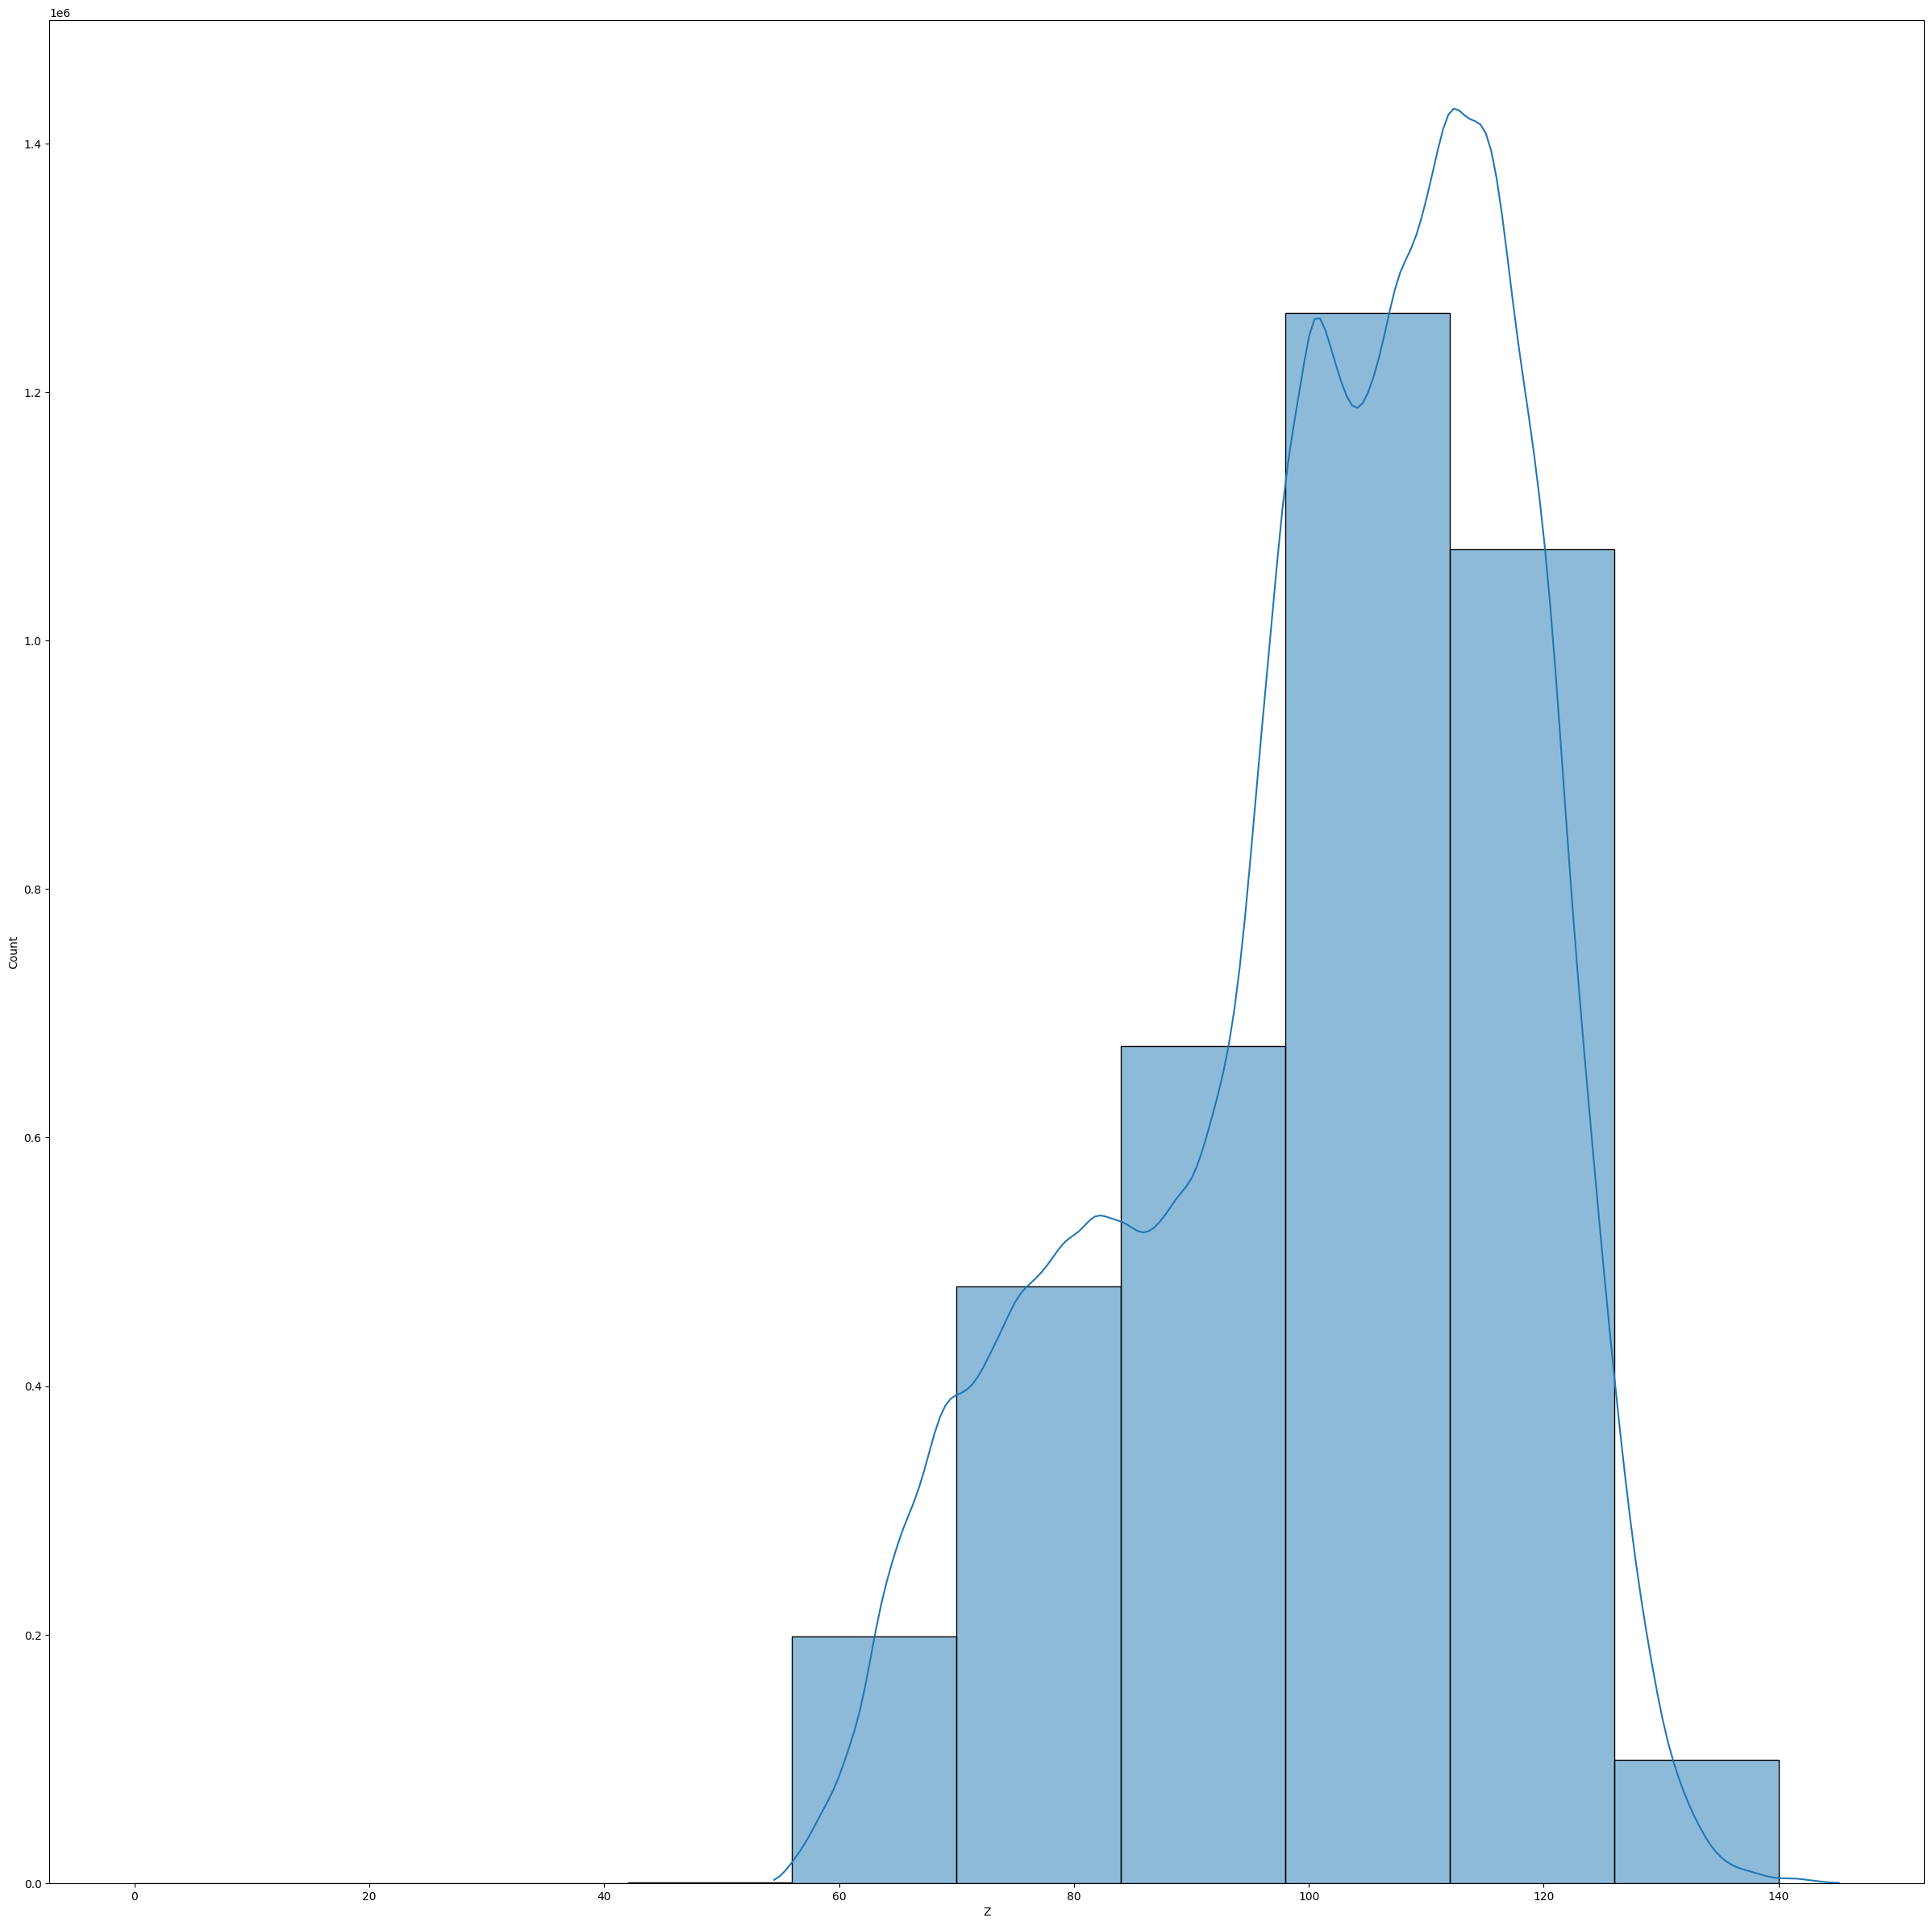

In [83]:
sns.histplot(
    data=lidar_dataset[
        (lidar_dataset["return_number"] == 2)
    ]["Z"],
    bins=bins,
    kde=True,
    binrange=(0, 140)
)

In [78]:
second_returns_hist, second_returns_bin_edges = np.histogram(
    lidar_dataset[lidar_dataset["return_number"] == 2]["Z"],
    bins=bins * 10,
    density=True,
    # range=(60, 140)
)

In [23]:
second_returns_hist, second_returns_bin_edges

(array([0.00428345, 0.00795076, 0.00978828, 0.01040683, 0.01753475,
        0.02334878, 0.0262972 , 0.01972408, 0.00525415, 0.00041172]),
 array([ 60.,  68.,  76.,  84.,  92., 100., 108., 116., 124., 132., 140.]))

In [29]:
matrix_probability = np.ndarray((10, 10))

0.004283449791932248

In [37]:
for i in range(0, 10):
    for j in range(0, 10):
        matrix_probability[i, j] = first_returns_hist[i] * second_returns_hist[j]

In [42]:
from sklearn.preprocessing import normalize

In [48]:
matrix_probability[7,6]

0.0007951664489973356

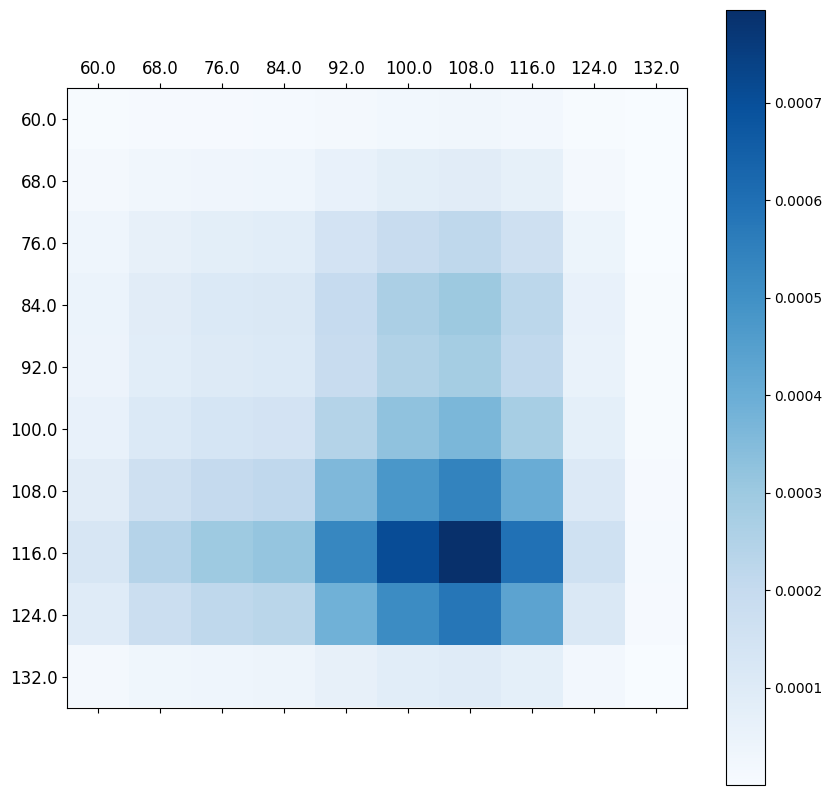

In [75]:
plt.figure(figsize=(10, 10))
plt.matshow(matrix_probability, cmap=plt.cm.Blues, fignum=1)
plt.xticks(range(len(second_returns_bin_edges) - 1), second_returns_bin_edges[:10], fontsize=12)
plt.yticks(range(len(second_returns_bin_edges) - 1), second_returns_bin_edges[:10], fontsize=12)
plt.colorbar()
plt.show()

In [77]:
second_returns_hist[0] * first_returns_hist[0]

4.17274107124829e-06

In [76]:
second_returns_hist[6] * first_returns_hist[7]

0.0007951664489973356